In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features8.csv')
df=df.drop(['rolloff','zero_crossing_rate','chroma_stft','spectral_centroid','spectral_bandwidth'],axis=1)
df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,35,36,37,38,39,40,41,42,43,English Type
0,-330.49750,-5.631140e-02,-1.305158e-02,129.82634,5.654399e-04,-1.087543e-03,-4.971954,3.198393e-02,1.747995e-03,31.724367,...,-2.752345,-1.821501e-03,9.363368e-04,-4.558670,6.158995e-03,3.925575e-03,-0.389210,1.502641e-03,2.480886e-03,1
1,-322.01425,-3.602875e-03,-2.423903e-02,128.47772,-6.527488e-03,-9.426854e-03,-19.397339,-2.809185e-05,6.502475e-03,38.388363,...,-1.544018,7.676435e-03,7.934333e-04,-1.401703,5.644315e-03,-5.167238e-04,-5.707905,-2.998314e-03,1.379392e-04,0
2,-340.64084,-1.116015e-02,-1.194324e-02,97.25810,-4.836332e-03,-6.452511e-03,-5.416280,-8.388211e-03,1.998641e-03,21.495487,...,-10.403498,-6.431966e-03,6.693075e-04,0.850455,-6.629119e-04,-1.358620e-03,-11.889046,-1.693906e-03,1.692394e-04,0
3,-377.72028,2.176717e-08,-6.462130e-09,140.99352,3.265076e-08,-5.951962e-09,-15.099728,-1.020336e-09,1.360448e-09,19.818373,...,-4.418817,0.000000e+00,-2.380785e-09,-4.824514,-3.401121e-10,1.020336e-09,-3.209569,0.000000e+00,1.211649e-09,0
4,-330.79733,-9.279275e-03,3.626792e-03,98.38888,2.809254e-03,2.656345e-03,-2.800510,7.261699e-03,1.559843e-03,30.394365,...,-0.268788,-2.190437e-03,1.166201e-03,-1.180020,-6.167702e-04,-1.668033e-03,0.379468,-3.115617e-03,2.192514e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,-321.37543,2.145348e-08,-1.592251e-09,125.37948,8.045056e-09,5.195765e-09,-18.120020,6.704213e-10,8.380267e-10,24.798357,...,-5.950925,2.681685e-09,-2.430277e-09,-10.296289,6.704213e-10,5.195765e-09,-6.076538,-1.340843e-09,4.190133e-11,0
2134,-334.67572,2.969725e-03,-7.079506e-03,115.60187,2.633094e-03,-3.973560e-03,-10.139031,-6.183048e-04,-9.918020e-04,27.466146,...,-22.601553,-3.429410e-03,-3.406802e-04,-8.010031,3.347575e-04,1.722395e-04,-8.633924,2.589215e-03,-7.905327e-05,0
2135,-237.90643,2.993488e-02,-6.727289e-03,103.26113,3.290961e-02,-5.506047e-03,-23.400814,1.604700e-02,-2.868054e-04,33.581520,...,-3.508986,-5.677356e-04,-7.979744e-04,-8.856752,3.319585e-05,-1.515660e-04,-2.979901,-5.256697e-04,1.029256e-03,0
2136,-312.73398,5.774686e-02,2.157346e-04,130.01166,4.117964e-02,-3.729525e-04,-6.817431,5.208343e-03,-5.306819e-04,19.614530,...,-1.335617,-9.031654e-05,2.355064e-03,-6.252686,-1.106754e-03,1.026079e-03,-0.870628,-1.179720e-03,-9.064542e-04,0


In [3]:
X = df.iloc[:,0:39]
y = df.iloc[:,39]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1710, 39) (1710,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='rmsprop', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=40,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
43/43 [==============================] - 1s 6ms/step - loss: 1.1369 - val_loss: 1.0047
Epoch 2/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.9942 - val_loss: 0.9059
Epoch 3/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.9167 - val_loss: 0.8481
Epoch 4/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.8664 - val_loss: 0.8058
Epoch 5/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.8269 - val_loss: 0.7729
Epoch 6/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.7962 - val_loss: 0.7477
Epoch 7/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.7725 - val_loss: 0.7282
Epoch 8/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.7538 - val_loss: 0.7126
Epoch 9/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.7387 - val_loss: 0.6998
Epoch 10/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7263 - val_loss: 0.6892

43/43 [==============================] - 0s 4ms/step - loss: 0.6210 - val_loss: 0.5873
Epoch 83/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6209 - val_loss: 0.5871
Epoch 84/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6208 - val_loss: 0.5870
Epoch 85/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6207 - val_loss: 0.5868
Epoch 86/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6206 - val_loss: 0.5867
Epoch 87/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6205 - val_loss: 0.5866
Epoch 88/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6204 - val_loss: 0.5864
Epoch 89/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6203 - val_loss: 0.5863
Epoch 90/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6202 - val_loss: 0.5863
Epoch 91/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6201 - val_loss: 0.5861
Epoc

43/43 [==============================] - 0s 2ms/step - loss: 0.6170 - val_loss: 0.5821
Epoch 163/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6170 - val_loss: 0.5821
Epoch 164/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6170 - val_loss: 0.5821
Epoch 165/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5821
Epoch 166/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5821
Epoch 167/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5820
Epoch 168/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5820
Epoch 169/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5819
Epoch 170/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6168 - val_loss: 0.5819
Epoch 171/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6168 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6160 - val_loss: 0.5806
Epoch 243/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6160 - val_loss: 0.5806
Epoch 244/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6160 - val_loss: 0.5806
Epoch 245/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6160 - val_loss: 0.5806
Epoch 246/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5806
Epoch 247/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5806
Epoch 248/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5806
Epoch 249/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5805
Epoch 250/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.5806
Epoch 251/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6159 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 323/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 324/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 325/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 326/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5798
Epoch 327/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 328/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 329/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5799
Epoch 330/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6156 - val_loss: 0.5798
Epoch 331/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6155 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5795
Epoch 403/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5795
Epoch 404/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 405/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 406/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 407/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 408/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 409/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 410/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5794
Epoch 411/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 483/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 484/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 485/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 486/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 487/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 488/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 489/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 490/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.5792
Epoch 491/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 563/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 564/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 565/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 566/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 567/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 568/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5791
Epoch 569/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 570/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 571/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 643/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 644/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 645/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 646/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 647/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5790
Epoch 648/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 649/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 650/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 651/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 723/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 724/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 725/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 726/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 727/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5790
Epoch 728/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 729/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5790
Epoch 730/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5789
Epoch 731/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 803/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 804/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 805/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 806/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 807/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 808/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 809/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 810/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 811/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 883/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 884/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 885/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 886/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 887/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 888/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5789
Epoch 889/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 890/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 891/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 963/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 964/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 965/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 966/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 967/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 968/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 969/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 970/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 971/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1043/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1044/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1045/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1046/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1047/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1048/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1049/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1050/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1051/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1122/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1123/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1124/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1125/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1126/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1127/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1128/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1129/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1130/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1201/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1202/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1203/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1204/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1205/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1206/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1207/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1208/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1209/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1280/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1281/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1282/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1283/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1284/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1285/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1286/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1287/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1288/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1359/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1360/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1361/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1362/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1363/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1364/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1365/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1366/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1367/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val

43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1438/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1439/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1440/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1441/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1442/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1443/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1444/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1445/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.5788
Epoch 1446/1500
43/43 [==============================] - 0s 2ms/step - loss: 0.6151 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8457943925233645
Precision:  0.7153681544239672
Recall:  0.8457943925233645
F1-score:  0.7751330888441973
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       362
           1       0.00      0.00      0.00        66

    accuracy                           0.85       428
   macro avg       0.42      0.50      0.46       428
weighted avg       0.72      0.85      0.78       428



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 84.58%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.99      0.92       362
           1       0.50      0.05      0.08        66

    accuracy                           0.85       428
   macro avg       0.68      0.52      0.50       428
weighted avg       0.80      0.85      0.79       428



# CNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [19]:
X = df.iloc[:,0:39]
y = df.iloc[:,39]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [21]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [22]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=40,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
38/38 [==============================] - 1s 11ms/step - loss: 1.0579 - accuracy: 0.7553 - val_loss: 0.4560 - val_accuracy: 0.8287
Epoch 2/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.5245 - accuracy: 0.7948 - val_loss: 0.4726 - val_accuracy: 0.8302
Epoch 3/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8061 - val_loss: 0.4553 - val_accuracy: 0.8287
Epoch 4/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.4790 - accuracy: 0.8195 - val_loss: 0.4431 - val_accuracy: 0.8271
Epoch 5/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4675 - accuracy: 0.8195 - val_loss: 0.4469 - val_accuracy: 0.8287
Epoch 6/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.4672 - accuracy: 0.8215 - val_loss: 0.4719 - val_accuracy: 0.8287
Epoch 7/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.8215 - val_loss: 0.4411 - val_accuracy: 0.8287
Epoch

38/38 [==============================] - 0s 8ms/step - loss: 0.4176 - accuracy: 0.8322 - val_loss: 0.4532 - val_accuracy: 0.8287
Epoch 59/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4148 - accuracy: 0.8422 - val_loss: 0.4533 - val_accuracy: 0.8287
Epoch 60/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4154 - accuracy: 0.8282 - val_loss: 0.4492 - val_accuracy: 0.8302
Epoch 61/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4096 - accuracy: 0.8342 - val_loss: 0.4533 - val_accuracy: 0.8302
Epoch 62/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.4070 - accuracy: 0.8369 - val_loss: 0.4500 - val_accuracy: 0.8287
Epoch 63/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.4113 - accuracy: 0.8316 - val_loss: 0.4615 - val_accuracy: 0.8287
Epoch 64/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.4105 - accuracy: 0.8289 - val_loss: 0.4515 - val_accuracy: 0.8287
Epoch 65/1500

38/38 [==============================] - 0s 7ms/step - loss: 0.3458 - accuracy: 0.8469 - val_loss: 0.4851 - val_accuracy: 0.8255
Epoch 116/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3431 - accuracy: 0.8536 - val_loss: 0.5031 - val_accuracy: 0.8209
Epoch 117/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3269 - accuracy: 0.8556 - val_loss: 0.4871 - val_accuracy: 0.8271
Epoch 118/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.8523 - val_loss: 0.4876 - val_accuracy: 0.8271
Epoch 119/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3410 - accuracy: 0.8536 - val_loss: 0.4943 - val_accuracy: 0.8224
Epoch 120/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3511 - accuracy: 0.8549 - val_loss: 0.4854 - val_accuracy: 0.8255
Epoch 121/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3335 - accuracy: 0.8543 - val_loss: 0.5104 - val_accuracy: 0.8240
Epoch 1

Epoch 172/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.2562 - accuracy: 0.8904 - val_loss: 0.6030 - val_accuracy: 0.7897
Epoch 173/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.8897 - val_loss: 0.6261 - val_accuracy: 0.8084
Epoch 174/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.9017 - val_loss: 0.5908 - val_accuracy: 0.8209
Epoch 175/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2446 - accuracy: 0.9004 - val_loss: 0.6739 - val_accuracy: 0.8193
Epoch 176/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2477 - accuracy: 0.9004 - val_loss: 0.6310 - val_accuracy: 0.8069
Epoch 177/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.9078 - val_loss: 0.6010 - val_accuracy: 0.8053
Epoch 178/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2585 - accuracy: 0.8951 - val_loss: 0.6283 - val_accuracy:

Epoch 229/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1866 - accuracy: 0.9198 - val_loss: 0.8269 - val_accuracy: 0.7804
Epoch 230/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1813 - accuracy: 0.9285 - val_loss: 0.7889 - val_accuracy: 0.7477
Epoch 231/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1978 - accuracy: 0.9211 - val_loss: 0.7966 - val_accuracy: 0.7866
Epoch 232/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1706 - accuracy: 0.9245 - val_loss: 0.7661 - val_accuracy: 0.7897
Epoch 233/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1808 - accuracy: 0.9184 - val_loss: 0.8523 - val_accuracy: 0.7804
Epoch 234/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1947 - accuracy: 0.9298 - val_loss: 0.8996 - val_accuracy: 0.7695
Epoch 235/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1759 - accuracy: 0.9238 - val_loss: 0.8819 - val_accuracy:

Epoch 286/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.1634 - accuracy: 0.9325 - val_loss: 0.9300 - val_accuracy: 0.7741
Epoch 287/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1513 - accuracy: 0.9412 - val_loss: 1.0050 - val_accuracy: 0.7975
Epoch 288/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1397 - accuracy: 0.9499 - val_loss: 0.9417 - val_accuracy: 0.7648
Epoch 289/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.1302 - accuracy: 0.9459 - val_loss: 1.0528 - val_accuracy: 0.7991
Epoch 290/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1422 - accuracy: 0.9459 - val_loss: 0.9687 - val_accuracy: 0.7819
Epoch 291/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.1394 - accuracy: 0.9398 - val_loss: 0.9468 - val_accuracy: 0.7352
Epoch 292/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1367 - accuracy: 0.9439 - val_loss: 0.9730 - val_accura

Epoch 343/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1190 - accuracy: 0.9566 - val_loss: 1.0642 - val_accuracy: 0.7383
Epoch 344/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1022 - accuracy: 0.9572 - val_loss: 1.0932 - val_accuracy: 0.7726
Epoch 345/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0979 - accuracy: 0.9679 - val_loss: 1.1494 - val_accuracy: 0.7944
Epoch 346/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1215 - accuracy: 0.9612 - val_loss: 1.1356 - val_accuracy: 0.7804
Epoch 347/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1231 - accuracy: 0.9492 - val_loss: 1.0512 - val_accuracy: 0.7882
Epoch 348/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1094 - accuracy: 0.9579 - val_loss: 1.2133 - val_accuracy: 0.6978
Epoch 349/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1257 - accuracy: 0.9445 - val_loss: 1.0891 - val_accuracy:

Epoch 400/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1059 - accuracy: 0.9646 - val_loss: 1.2894 - val_accuracy: 0.7850
Epoch 401/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0835 - accuracy: 0.9706 - val_loss: 1.2518 - val_accuracy: 0.7508
Epoch 402/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0827 - accuracy: 0.9706 - val_loss: 1.2832 - val_accuracy: 0.7352
Epoch 403/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0880 - accuracy: 0.9659 - val_loss: 1.2757 - val_accuracy: 0.7383
Epoch 404/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.9659 - val_loss: 1.2161 - val_accuracy: 0.7835
Epoch 405/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1137 - accuracy: 0.9599 - val_loss: 1.3468 - val_accuracy: 0.7882
Epoch 406/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1092 - accuracy: 0.9619 - val_loss: 1.2018 - val_accuracy

Epoch 457/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0817 - accuracy: 0.9706 - val_loss: 1.2493 - val_accuracy: 0.7570
Epoch 458/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0833 - accuracy: 0.9699 - val_loss: 1.3167 - val_accuracy: 0.7227
Epoch 459/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0685 - accuracy: 0.9746 - val_loss: 1.3494 - val_accuracy: 0.7570
Epoch 460/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0975 - accuracy: 0.9686 - val_loss: 1.3236 - val_accuracy: 0.7648
Epoch 461/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0969 - accuracy: 0.9746 - val_loss: 1.4641 - val_accuracy: 0.7804
Epoch 462/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0947 - accuracy: 0.9713 - val_loss: 1.3401 - val_accuracy: 0.7368
Epoch 463/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0916 - accuracy: 0.9719 - val_loss: 1.4104 - val_acc

Epoch 514/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0682 - accuracy: 0.9806 - val_loss: 1.4199 - val_accuracy: 0.7461
Epoch 515/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0704 - accuracy: 0.9719 - val_loss: 1.4586 - val_accuracy: 0.7960
Epoch 516/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0596 - accuracy: 0.9779 - val_loss: 1.5133 - val_accuracy: 0.7492
Epoch 517/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0587 - accuracy: 0.9779 - val_loss: 1.5674 - val_accuracy: 0.7928
Epoch 518/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0911 - accuracy: 0.9759 - val_loss: 1.4214 - val_accuracy: 0.7212
Epoch 519/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0683 - accuracy: 0.9779 - val_loss: 1.5580 - val_accuracy: 0.7882
Epoch 520/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1051 - accuracy: 0.9626 - val_loss: 1.4576 - val_accuracy

Epoch 571/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1077 - accuracy: 0.9666 - val_loss: 1.4939 - val_accuracy: 0.7586
Epoch 572/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9799 - val_loss: 1.4865 - val_accuracy: 0.7383
Epoch 573/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9840 - val_loss: 1.6099 - val_accuracy: 0.7819
Epoch 574/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0566 - accuracy: 0.9773 - val_loss: 1.6669 - val_accuracy: 0.7570
Epoch 575/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0634 - accuracy: 0.9799 - val_loss: 1.5176 - val_accuracy: 0.7336
Epoch 576/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0543 - accuracy: 0.9813 - val_loss: 1.5942 - val_accuracy: 0.7866
Epoch 577/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0537 - accuracy: 0.9786 - val_loss: 1.5548 - val_accuracy:

Epoch 628/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 1.5162 - val_accuracy: 0.7757
Epoch 629/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0697 - accuracy: 0.9799 - val_loss: 1.5958 - val_accuracy: 0.7804
Epoch 630/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 1.5768 - val_accuracy: 0.7492
Epoch 631/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0746 - accuracy: 0.9759 - val_loss: 1.4438 - val_accuracy: 0.7492
Epoch 632/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0495 - accuracy: 0.9793 - val_loss: 1.6458 - val_accuracy: 0.7913
Epoch 633/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0654 - accuracy: 0.9773 - val_loss: 1.4693 - val_accuracy: 0.7492
Epoch 634/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 1.7938 - val_accuracy:

Epoch 685/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 1.7950 - val_accuracy: 0.7679
Epoch 686/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0462 - accuracy: 0.9840 - val_loss: 1.6622 - val_accuracy: 0.7523
Epoch 687/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0444 - accuracy: 0.9853 - val_loss: 1.7159 - val_accuracy: 0.7648
Epoch 688/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9759 - val_loss: 1.5736 - val_accuracy: 0.7850
Epoch 689/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9846 - val_loss: 1.6233 - val_accuracy: 0.7555
Epoch 690/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0616 - accuracy: 0.9793 - val_loss: 1.5766 - val_accuracy: 0.7523
Epoch 691/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0480 - accuracy: 0.9806 - val_loss: 1.6643 - val_accuracy:

Epoch 742/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9860 - val_loss: 1.7146 - val_accuracy: 0.7383
Epoch 743/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.9820 - val_loss: 1.7023 - val_accuracy: 0.7227
Epoch 744/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0653 - accuracy: 0.9813 - val_loss: 1.5270 - val_accuracy: 0.7555
Epoch 745/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9866 - val_loss: 1.5340 - val_accuracy: 0.7695
Epoch 746/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9846 - val_loss: 1.7650 - val_accuracy: 0.7960
Epoch 747/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0525 - accuracy: 0.9820 - val_loss: 1.6648 - val_accuracy: 0.7430
Epoch 748/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0545 - accuracy: 0.9779 - val_loss: 1.7325 - val_accuracy:

Epoch 799/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9860 - val_loss: 1.9974 - val_accuracy: 0.7991
Epoch 800/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0565 - accuracy: 0.9820 - val_loss: 1.9545 - val_accuracy: 0.7741
Epoch 801/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9886 - val_loss: 1.9008 - val_accuracy: 0.7555
Epoch 802/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0553 - accuracy: 0.9840 - val_loss: 1.9633 - val_accuracy: 0.7664
Epoch 803/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0492 - accuracy: 0.9866 - val_loss: 1.9351 - val_accuracy: 0.7850
Epoch 804/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 1.9020 - val_accuracy: 0.7570
Epoch 805/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0601 - accuracy: 0.9846 - val_loss: 1.8524 - val_accuracy:

Epoch 856/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.9860 - val_loss: 1.7483 - val_accuracy: 0.7617
Epoch 857/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9853 - val_loss: 1.9146 - val_accuracy: 0.7679
Epoch 858/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 1.9113 - val_accuracy: 0.7352
Epoch 859/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.9886 - val_loss: 2.0827 - val_accuracy: 0.7757
Epoch 860/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0456 - accuracy: 0.9880 - val_loss: 1.8068 - val_accuracy: 0.7648
Epoch 861/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0688 - accuracy: 0.9813 - val_loss: 1.9503 - val_accuracy: 0.7414
Epoch 862/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 1.8735 - val_accuracy:

Epoch 913/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0299 - accuracy: 0.9893 - val_loss: 2.1914 - val_accuracy: 0.7570
Epoch 914/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0367 - accuracy: 0.9860 - val_loss: 1.9834 - val_accuracy: 0.7664
Epoch 915/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0494 - accuracy: 0.9893 - val_loss: 1.8924 - val_accuracy: 0.7586
Epoch 916/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 1.8055 - val_accuracy: 0.7508
Epoch 917/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 1.8703 - val_accuracy: 0.7539
Epoch 918/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 2.0416 - val_accuracy: 0.7679
Epoch 919/1500
38/38 [==============================] - 0s 11ms/step - loss: 0.0498 - accuracy: 0.9893 - val_loss: 1.8901 - val_acc

Epoch 970/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 1.9906 - val_accuracy: 0.7695
Epoch 971/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 1.9402 - val_accuracy: 0.7741
Epoch 972/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.9846 - val_loss: 1.9464 - val_accuracy: 0.7274
Epoch 973/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 1.9154 - val_accuracy: 0.7508
Epoch 974/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 1.7536 - val_accuracy: 0.7664
Epoch 975/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0392 - accuracy: 0.9900 - val_loss: 1.8761 - val_accuracy: 0.7570
Epoch 976/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9906 - val_loss: 1.9543 - val_accuracy:

38/38 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.9880 - val_loss: 2.0517 - val_accuracy: 0.7445
Epoch 1027/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9860 - val_loss: 2.2400 - val_accuracy: 0.7913
Epoch 1028/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 2.1461 - val_accuracy: 0.7773
Epoch 1029/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0398 - accuracy: 0.9893 - val_loss: 2.0549 - val_accuracy: 0.7601
Epoch 1030/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.9940 - val_loss: 1.9790 - val_accuracy: 0.7835
Epoch 1031/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 1.9316 - val_accuracy: 0.7648
Epoch 1032/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0411 - accuracy: 0.9893 - val_loss: 2.0948 - val_accuracy: 0.7710
E

38/38 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 2.0617 - val_accuracy: 0.7991
Epoch 1083/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0437 - accuracy: 0.9846 - val_loss: 2.0049 - val_accuracy: 0.7508
Epoch 1084/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 2.1446 - val_accuracy: 0.7835
Epoch 1085/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.9926 - val_loss: 2.1373 - val_accuracy: 0.7928
Epoch 1086/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 2.1388 - val_accuracy: 0.7741
Epoch 1087/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9913 - val_loss: 2.3567 - val_accuracy: 0.7897
Epoch 1088/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 2.2629 - val_accuracy: 0.7757
E

38/38 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 2.2450 - val_accuracy: 0.7664
Epoch 1139/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 2.3802 - val_accuracy: 0.7913
Epoch 1140/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 2.3261 - val_accuracy: 0.7648
Epoch 1141/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 2.1020 - val_accuracy: 0.7664
Epoch 1142/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.9920 - val_loss: 2.1545 - val_accuracy: 0.7788
Epoch 1143/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 2.1827 - val_accuracy: 0.7866
Epoch 1144/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9920 - val_loss: 2.1880 - val_accuracy: 0.7741
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9900 - val_loss: 2.2973 - val_accuracy: 0.7555
Epoch 1195/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 2.1246 - val_accuracy: 0.7788
Epoch 1196/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9920 - val_loss: 2.3086 - val_accuracy: 0.7492
Epoch 1197/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 2.3302 - val_accuracy: 0.7741
Epoch 1198/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 2.1681 - val_accuracy: 0.7695
Epoch 1199/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9873 - val_loss: 2.0506 - val_accuracy: 0.7523
Epoch 1200/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9920 - val_loss: 2.2013 - val_accuracy: 0.7804
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9880 - val_loss: 2.2168 - val_accuracy: 0.7819
Epoch 1251/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 2.2456 - val_accuracy: 0.7710
Epoch 1252/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0246 - accuracy: 0.9940 - val_loss: 2.2102 - val_accuracy: 0.7710
Epoch 1253/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9940 - val_loss: 2.3439 - val_accuracy: 0.7741
Epoch 1254/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9933 - val_loss: 2.4558 - val_accuracy: 0.7788
Epoch 1255/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 2.3165 - val_accuracy: 0.7726
Epoch 1256/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0477 - accuracy: 0.9866 - val_loss: 2.2451 - val_accuracy: 0.7944
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9873 - val_loss: 2.5403 - val_accuracy: 0.7913
Epoch 1307/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 2.5384 - val_accuracy: 0.7773
Epoch 1308/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 2.4396 - val_accuracy: 0.7804
Epoch 1309/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9900 - val_loss: 2.4542 - val_accuracy: 0.7897
Epoch 1310/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.9913 - val_loss: 2.4334 - val_accuracy: 0.7897
Epoch 1311/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 2.2273 - val_accuracy: 0.7804
Epoch 1312/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9940 - val_loss: 2.4540 - val_accuracy: 0.7804
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9926 - val_loss: 2.7195 - val_accuracy: 0.7897
Epoch 1363/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9913 - val_loss: 2.2808 - val_accuracy: 0.7679
Epoch 1364/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 2.2499 - val_accuracy: 0.7601
Epoch 1365/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 2.5806 - val_accuracy: 0.7975
Epoch 1366/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 0.9913 - val_loss: 2.4263 - val_accuracy: 0.7835
Epoch 1367/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9926 - val_loss: 2.4773 - val_accuracy: 0.8022
Epoch 1368/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0389 - accuracy: 0.9866 - val_loss: 2.3534 - val_accuracy: 0.7664
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 2.3324 - val_accuracy: 0.7679
Epoch 1419/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 2.5610 - val_accuracy: 0.7741
Epoch 1420/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9906 - val_loss: 2.3977 - val_accuracy: 0.7617
Epoch 1421/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0395 - accuracy: 0.9900 - val_loss: 2.6180 - val_accuracy: 0.7944
Epoch 1422/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 2.4361 - val_accuracy: 0.7819
Epoch 1423/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0150 - accuracy: 0.9926 - val_loss: 2.5409 - val_accuracy: 0.7757
Epoch 1424/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0395 - accuracy: 0.9900 - val_loss: 2.3570 - val_accuracy: 0.7617
E

38/38 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9953 - val_loss: 2.8930 - val_accuracy: 0.7773
Epoch 1475/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9913 - val_loss: 2.7440 - val_accuracy: 0.7882
Epoch 1476/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9933 - val_loss: 2.6437 - val_accuracy: 0.7757
Epoch 1477/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9913 - val_loss: 2.6170 - val_accuracy: 0.7897
Epoch 1478/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.9940 - val_loss: 2.5537 - val_accuracy: 0.7586
Epoch 1479/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 2.6641 - val_accuracy: 0.7960
Epoch 1480/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9940 - val_loss: 2.6066 - val_accuracy: 0.7679
E

In [23]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 2ms/step
Accuracy: 0.7757009345794392


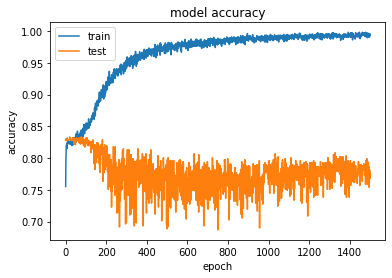

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

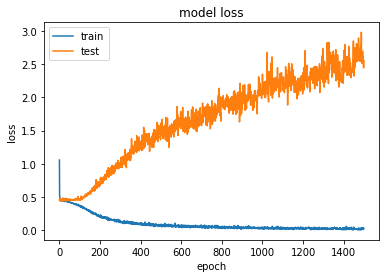

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
from pycm import ConfusionMatrix


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.86      0.88      0.87       532
           1       0.33      0.29      0.31       110

    accuracy                           0.78       642
   macro avg       0.59      0.58      0.59       642
weighted avg       0.77      0.78      0.77       642

Predict   0         1         
Actual
0         466       66        

1         78        32        





Overall Statistics : 

95% CI                                                            (0.74343,0.80797)
ACC Macro                                                         0.7757
ARI                                                               0.12018
AUNP                                                              0.58342
AUNU                                                              0.58342
Bangdiwala B                                                      0.72681
Bennett S                                                         0.5514
CBA     